### Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# reading in training data as hp (housing prices)
# Variable is named hp, for home prices.
# I do not have access to the truth for the testing, so I will only score on
# a subset of the training data
hp = pd.read_csv('./datasets/train.csv')

In [3]:
hp.shape

(2051, 81)

In [4]:
hp.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
pd. set_option('display.max_rows', 500)
hp.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [8]:
# a number of values were missing, so I wanted to see percentage instead of the number
hp.isnull().mean().sort_values(ascending = False).head(20)

Pool QC           0.995612
Misc Feature      0.968308
Alley             0.931741
Fence             0.804973
Fireplace Qu      0.487567
Lot Frontage      0.160897
Garage Finish     0.055583
Garage Cond       0.055583
Garage Qual       0.055583
Garage Yr Blt     0.055583
Garage Type       0.055095
Bsmt Exposure     0.028279
BsmtFin Type 2    0.027304
BsmtFin Type 1    0.026816
Bsmt Cond         0.026816
Bsmt Qual         0.026816
Mas Vnr Type      0.010726
Mas Vnr Area      0.010726
Bsmt Half Bath    0.000975
Bsmt Full Bath    0.000975
dtype: float64

In [9]:
# dropping columns missing more than 15% of data altogether
# Imputing was an option, but I do not want to change the data
# I also do not want to fall victim to data leakage because I am not ready to split the data set
hp.drop(columns=['Id', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage'],inplace=True)

# I also decided to drop the ID column because each house id is unique, thus, not useful

In [10]:
# dropping rows with nans now
hp.dropna(inplace=True)

In [11]:
hp.shape

(1866, 74)

In [12]:
# calculation shows how much of my data I still have
1866/ 2051

0.9098000975134081

In [14]:
# reformatting the column names to make them easier to work with
# lowercasing all, and removing spaces
def format_col_name(col_name):
    new_name = col_name.lower().replace(' ', '_')
    return new_name

In [15]:
hp.columns = hp.columns.map(format_col_name)

In [16]:
hp.head()

,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
1,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
2,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
3,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
4,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


In [18]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              1866 non-null   int64  
 1   ms_subclass      1866 non-null   int64  
 2   ms_zoning        1866 non-null   object 
 3   lot_area         1866 non-null   int64  
 4   street           1866 non-null   object 
 5   lot_shape        1866 non-null   object 
 6   land_contour     1866 non-null   object 
 7   utilities        1866 non-null   object 
 8   lot_config       1866 non-null   object 
 9   land_slope       1866 non-null   object 
 10  neighborhood     1866 non-null   object 
 11  condition_1      1866 non-null   object 
 12  condition_2      1866 non-null   object 
 13  bldg_type        1866 non-null   object 
 14  house_style      1866 non-null   object 
 15  overall_qual     1866 non-null   int64  
 16  overall_cond     1866 non-null   int64  
 17  year_built    

In [19]:
# data is in now clean, and ready to begin working with
# visualizations to begin below

## Visualization

### Target Price Data Distribution

<AxesSubplot:xlabel='saleprice'>

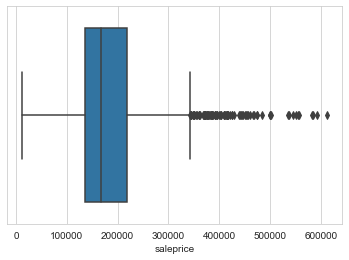

In [40]:
# looking at target first, there seems to be several outliers
sns.set_style(style="whitegrid")
sns.boxplot(hp['saleprice'])

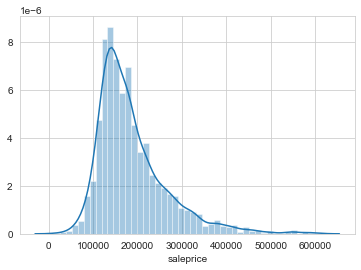

In [43]:
# can confirm from the long tail on our histogram
sns.distplot(hp['saleprice']);

In [44]:
#transforming the price column helps remedy this, and dropping outliers as well would help

### Correlation

<AxesSubplot:>

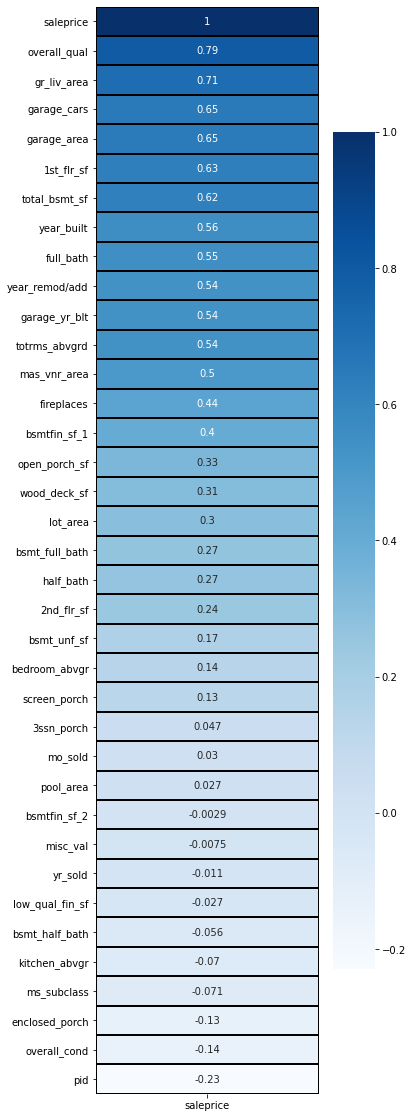

In [20]:
# creating corr table - only of target column bc of size of dataset
hp_corr = hp.corr()
plt.figure(figsize=(5,20))
sns.heatmap(hp_corr[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='Blues', annot=True, linewidths=1, linecolor='Black')

<AxesSubplot:>

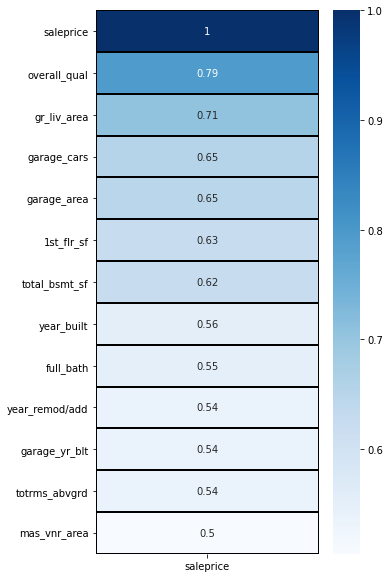

In [21]:
# several not that useful variables, I'm going to mask moderates to focus on stronly high and low correlations
strong_corr = hp_corr[(hp_corr['saleprice'] > .5) |(hp_corr['saleprice'] < -.5)]
plt.figure(figsize=(5,10))
sns.heatmap(strong_corr[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='Blues', annot=True, linewidths=1, linecolor='Black')

In [28]:
# checking the columns that made the strong correlation group
strong_corr['saleprice'].index

Index(['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath',
       'totrms_abvgrd', 'garage_yr_blt', 'garage_cars', 'garage_area',
       'saleprice'],
      dtype='object')

In [29]:
strong_cols = strong_corr['saleprice'].index

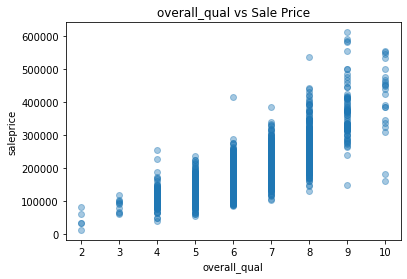

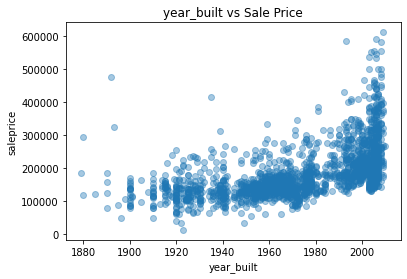

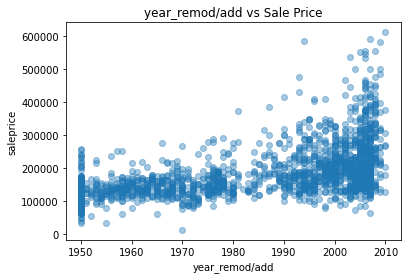

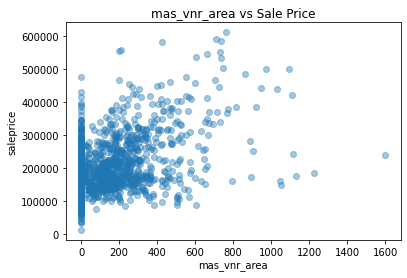

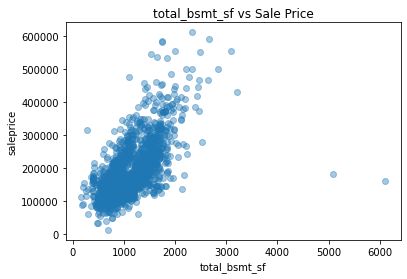

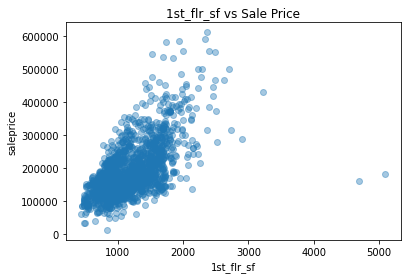

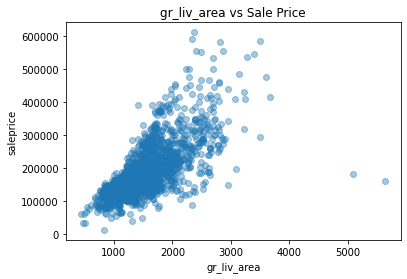

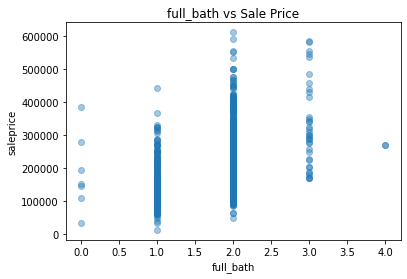

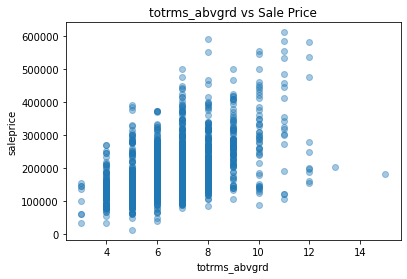

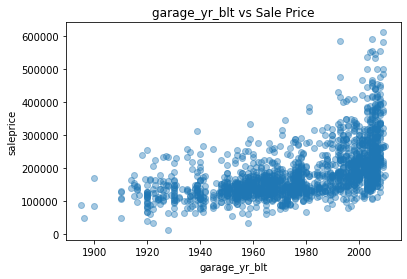

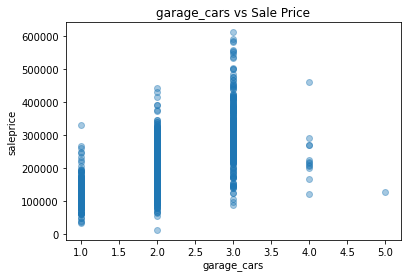

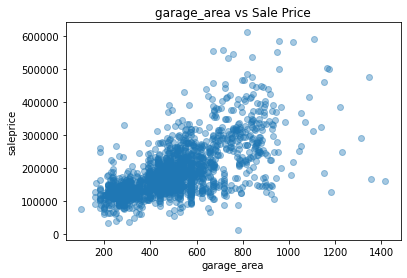

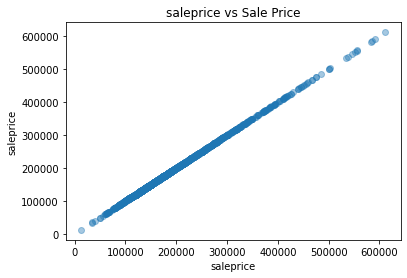

In [33]:
for col_name in strong_cols:
    plt.scatter(hp[col_name], hp['saleprice'], alpha=0.4)
    plt.xlabel(col_name)
    plt.ylabel('saleprice')
    plt.title(f'{col_name} vs Sale Price')
    plt.show()

In [47]:
# looking into categoricals
hp.select_dtypes(include='object').columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'sale_type'],
      dtype='object')

In [48]:
cat_data = hp.select_dtypes(include='object').columns

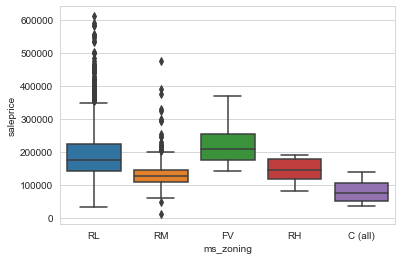

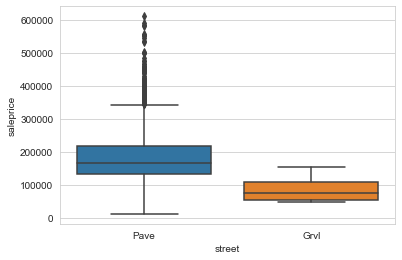

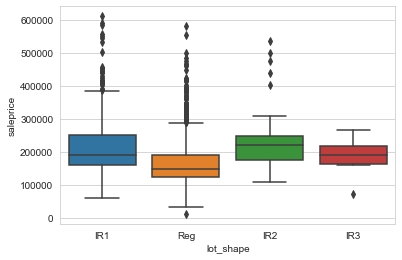

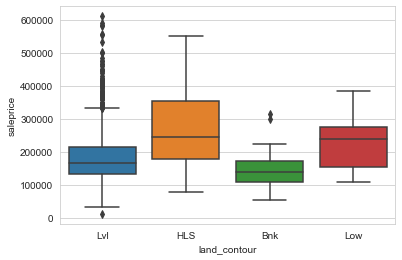

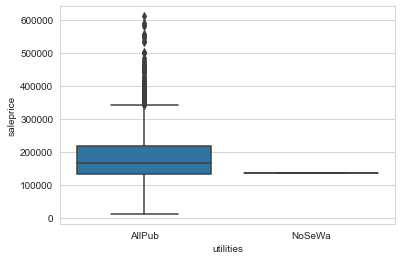

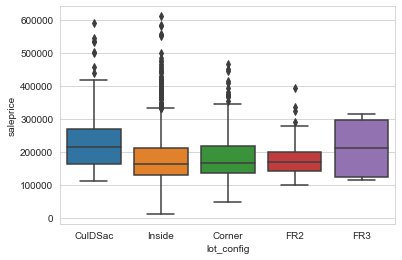

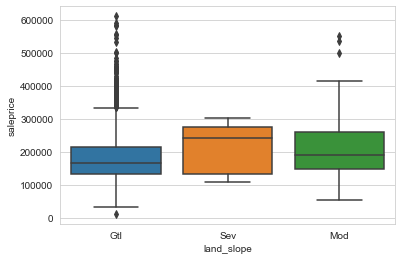

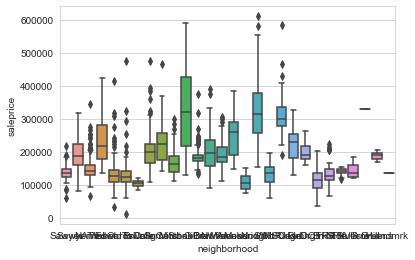

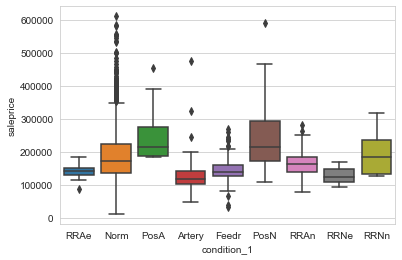

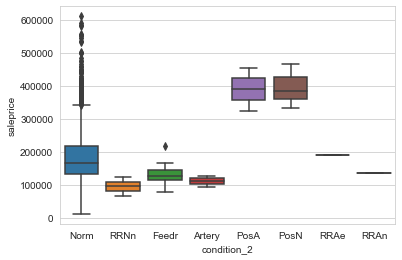

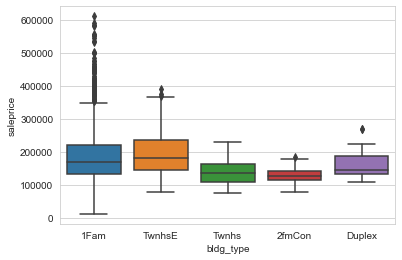

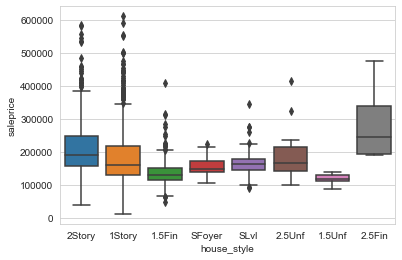

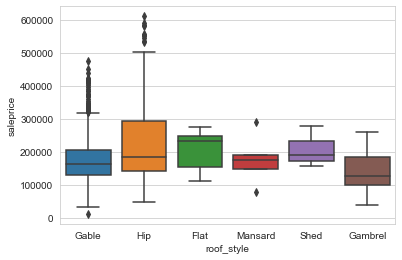

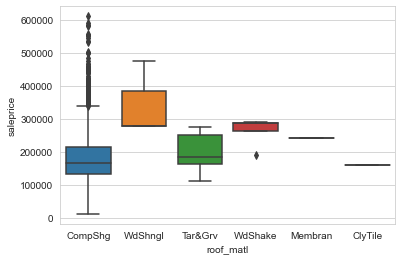

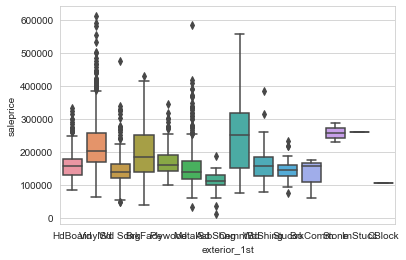

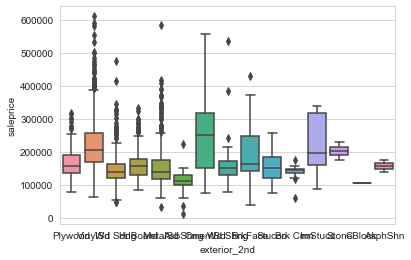

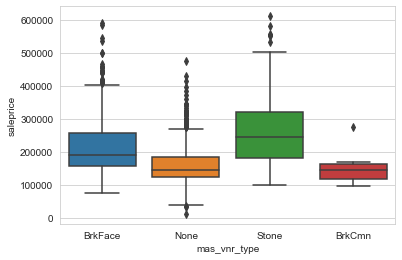

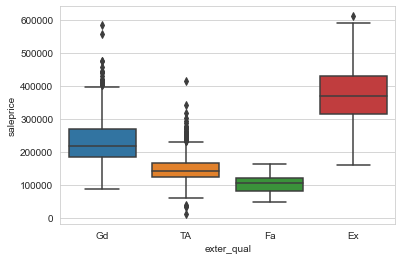

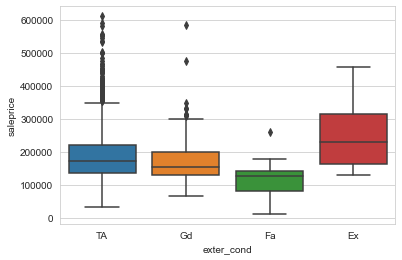

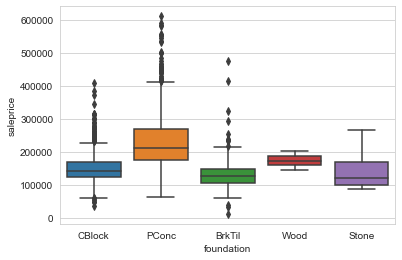

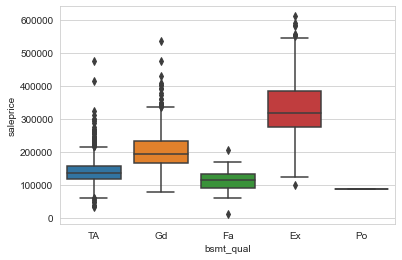

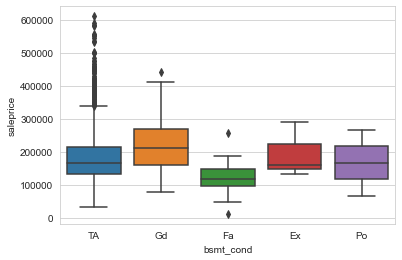

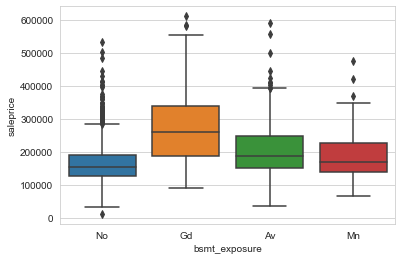

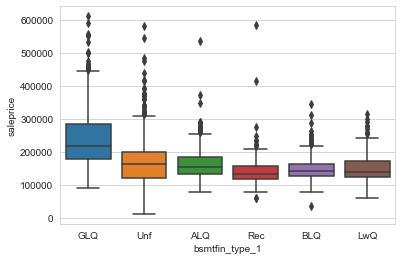

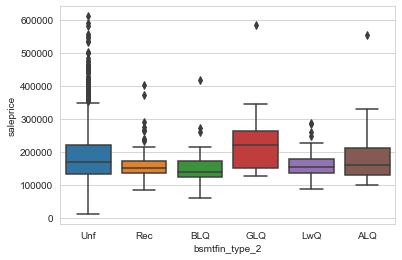

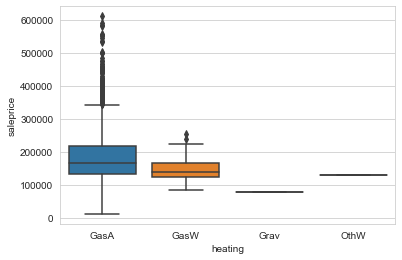

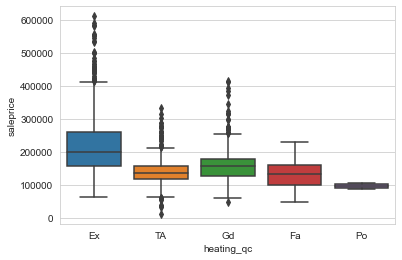

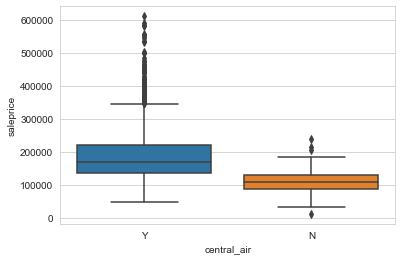

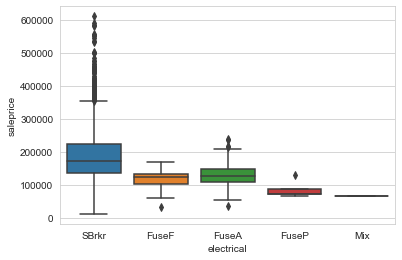

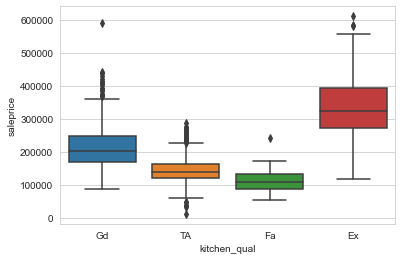

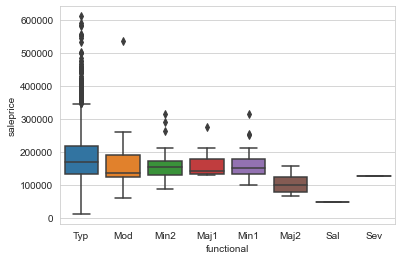

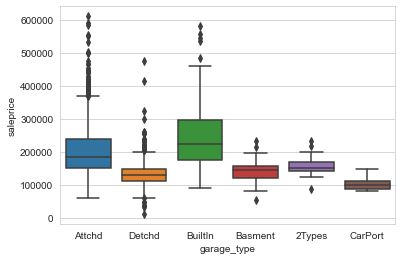

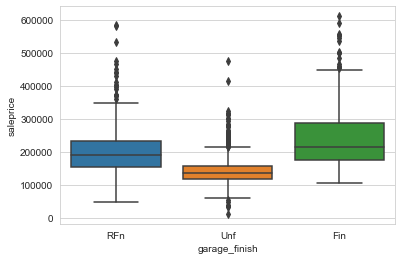

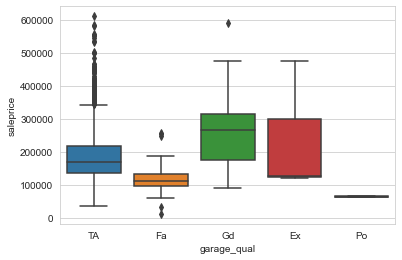

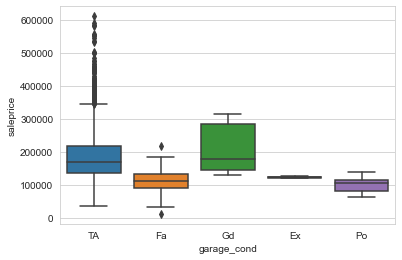

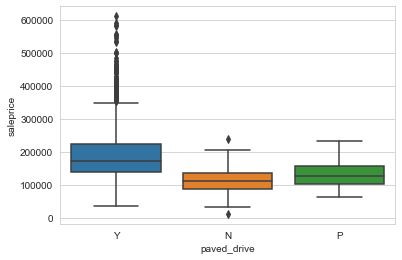

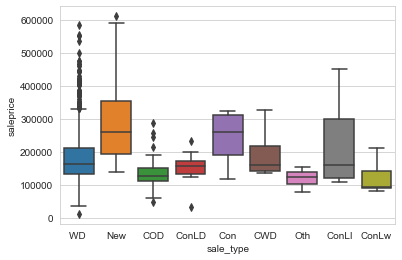

In [50]:
for cat_col in cat_data:
    sns.boxplot(x=hp[cat_col], y=hp['saleprice'])
    plt.show()

### Preprocessing

In [53]:
# dropping outlier home sizes
hp = hp[hp.gr_liv_area < 4000]

In [55]:
# taking log of price
hp.saleprice = np.log1p(hp.saleprice)

In [57]:
# changing some of the numericals to categoricals
hp = hp.replace({"ms_subclass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "mo_sold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [70]:
# creating some features, these are groupings based on rankings
hp['qual_overall'] = hp.overall_qual.replace({1 : 1, 2: 1, 3: 1,
                                             4: 2, 5: 2, 6: 2,
                                             7: 3, 8: 3, 9: 3, 10: 3})

hp['cond_overall'] = hp.overall_cond.replace({1 : 1, 2: 1, 3: 1,
                                             4: 2, 5: 2, 6: 2,
                                             7: 3, 8: 3, 9: 3, 10: 3})
hp['cond_garage'] = hp.garage_cond.replace({1 : 1, 
                                            2: 2, 3: 2,
                                             4: 3, 5: 3})

hp['qual_garage'] = hp.garage_cond.replace({1 : 1, 
                                            2: 2, 3: 2,
                                             4: 3, 5: 3})

hp['ttl_sf'] = hp['gr_liv_area'] + hp['total_bsmt_sf']

hp['total_bath'] = hp['bsmt_full_bath'] + (0.5 * hp['bsmt_half_bath']) +  hp['full_bath'] + (0.5 * hp['half_bath'])

In [73]:
hp.garage_cars

0       2.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
2046    2.0
2047    2.0
2048    2.0
2049    1.0
2050    2.0
Name: garage_cars, Length: 1864, dtype: float64

<AxesSubplot:>

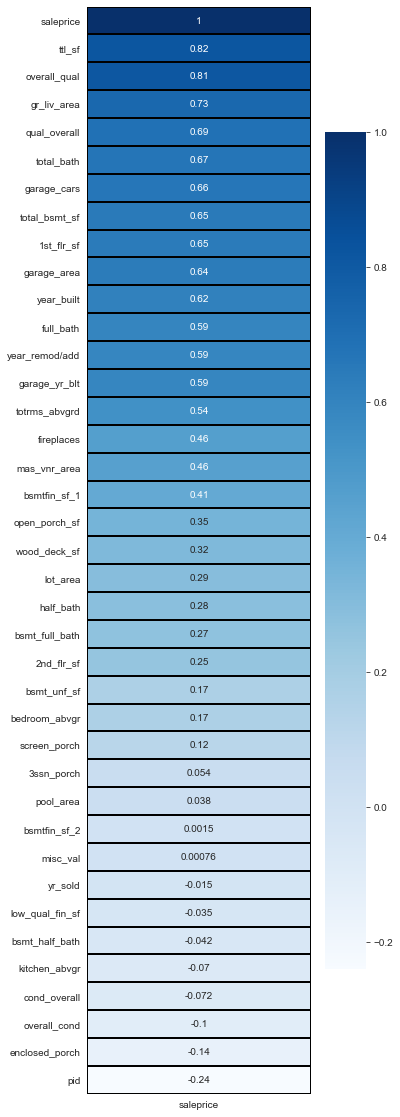

In [71]:
hp_corr2 = hp.corr()
plt.figure(figsize=(5,20))
sns.heatmap(hp_corr2[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='Blues', annot=True, linewidths=1, linecolor='Black')

<AxesSubplot:>

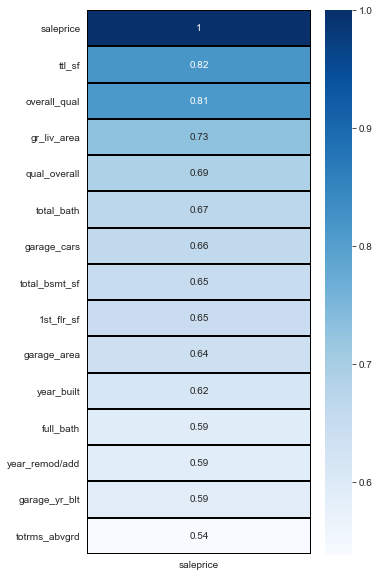

In [74]:
strong_corr2 = hp_corr2[(hp_corr2['saleprice'] > .5) |(hp_corr2['saleprice'] < -.5)]
plt.figure(figsize=(5,10))
sns.heatmap(strong_corr2[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='Blues', annot=True, linewidths=1, linecolor='Black')

In [77]:
# taking columns with strong correlations to make polynomial features 
make_pol_cols = strong_corr2.index

In [79]:
# this creates columns of polynomial features from the stronly correlated columns
for name in make_pol_cols:
    hp[name + '2'] = hp[name] ** 2
    hp[name + '3'] = hp[name] ** 3

<AxesSubplot:>

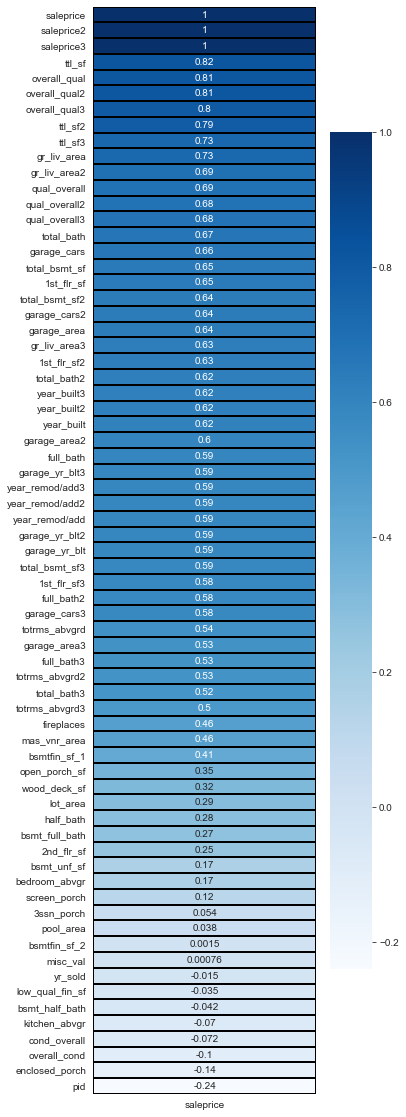

In [80]:
hp_corr3 = hp.corr()
plt.figure(figsize=(5,20))
sns.heatmap(hp_corr3[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='Blues', annot=True, linewidths=1, linecolor='Black')

In [83]:
catty_cols = hp.select_dtypes(include='object').columns

In [86]:
df = pd.get_dummies(data = hp, columns=catty_cols, drop_first=True)

## Modeling

In [105]:
# With well prepared data, a dataset can often be well represented with a linear regression

In [87]:
# creating X and y
X = df.drop(columns='saleprice')
y = df['saleprice']

In [89]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
# creating instance of linear regression model
lr = LinearRegression()

In [93]:
# fitting my train data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [99]:
# generating predictions
y_hat = lr.predict(X_test)

In [101]:
# Evaluation through coefficient of determiniation
r2_score(y_test, y_hat)

0.999997459929571

In [103]:
# Evaluation of RMSE
mean_squared_error(y_test, y_hat, squared=False)

0.0005753405952995333

In [106]:
# The metrics above show that the model works very well - but I previously changed the dataset by taking the log price
# I want to see what the metrics look like when transferring back to the original by exponentiating

In [113]:
true_price = np.exp(y_test)
pred_price = np.exp(y_hat)

In [114]:
r2_score(true_price, pred_price)

0.999994721490244

In [115]:
mean_squared_error(true_price, pred_price, squared=False)

166.5591478448679

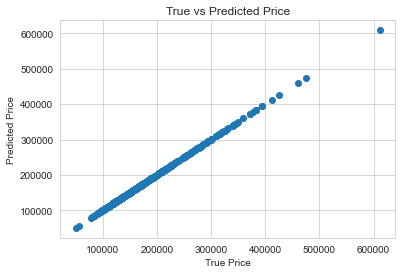

In [119]:
# plotting true vs predicted to show how well the two match one anoter
plt.scatter(true_price, pred_price)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True vs Predicted Price');